# Exploratory Data Analysis - Movie Lens Dataset

# Chinmayi Sahai
# 200968144


## Metadata

userId: Anonymised ids to represent a user
    movieId: Ids representing movies rated by user & is consistent across `ratings.csv`, `tags.csv`, `movies.csv`, and `links.csv`

#### Ratings Data File Structure (ratings.csv):
    It contains:

    userId,movieId,rating,timestamp

    Ratings: made on a 5-star scale, with half-star increments (0.5 stars - 5.0 stars).

    Timestamps: represent seconds since midnight Coordinated Universal Time (UTC) of January 1, 1970.

#### Tags Data File Structure (tags.csv):
    It contains:

    userId,movieId,tag,timestamp

    Tags: User-generated metadata about movies. Each tag is typically a single word or short phrase. The meaning, value, and purpose of a particular tag is determined by each user.

    Timestamps: represent seconds since midnight Coordinated Universal Time (UTC) of January 1, 1970.

#### Movies Data File Structure (movies.csv):
    It contains:
    movieId,title,genres

    Movie titles: Entered manually or imported from <https://www.themoviedb.org/>, and include the year of release in parentheses. Errors and inconsistencies may exist in these titles.

    Genres are:

        * Action
        * Adventure
        * Animation
        * Children's
        * Comedy
        * Crime
        * Documentary
        * Drama
        * Fantasy
        * Film-Noir
        * Horror
        * Musical
        * Mystery
        * Romance
        * Sci-Fi
        * Thriller
        * War
        * Western

In [2]:
project_name = 'movielens-eda'

# Importing libraries

In [3]:
import numpy as np; 
import pandas as pd;
import matplotlib.pyplot as plt
import seaborn as sns
import bar_chart_race as bcr
import pycountry             
import operator
from collections import Counter
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine


# Converting data set into pandas dataframe

In [4]:
movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')
tags = pd.read_csv('tags.csv')
links =pd.read_csv('links.csv')

In [5]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


# Extracting the year from the Title


In [6]:
movies['Year'] = movies['title'].str.extract('.*\((.*)\).*',expand = False)
movies.head()

,movieId,title,genres,Year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995


In [7]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [8]:
tags = pd.read_csv("tags.csv")
tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


# Merging the usefull csv files for eda 

In [9]:
movie_rating = pd.merge(movies, ratings , on = 'movieId')

movie_rating.drop('timestamp', inplace=True, axis=1)

In [10]:
movie_rating.describe()

,movieId,userId,rating
count,100836.000000,100836.000000,100836.000000
mean,19435.295718,326.127564,3.501557
std,35530.987199,182.618491,1.042529
min,1.000000,1.000000,0.500000
25%,1199.000000,177.000000,3.000000
50%,2991.000000,325.000000,3.500000
75%,8122.000000,477.000000,4.000000
max,193609.000000,610.000000,5.000000


In [11]:
movie_rating.tail()

,movieId,title,genres,Year,userId,rating
100831,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,2017,184,4.0
100832,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,2017,184,3.5
100833,193585,Flint (2017),Drama,2017,184,3.5
100834,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,2018,184,3.5
100835,193609,Andrew Dice Clay: Dice Rules (1991),Comedy,1991,331,4.0


In [12]:
print(f'Number of rows: {movie_rating.shape[0]}')
print(f'Number of columns: {movie_rating.shape[1]}')

Number of rows: 100836
Number of columns: 6


### Dropping Missing Values<a id='C43'></a>

In [13]:
print('Number of missing values in movieid: {}'.format(movies['movieId'].isna().sum()))
movies.dropna(subset=['movieId'], inplace=True)
print('Number of missing values in imdb_id after drop: {}'.format(movies['movieId'].isna().sum()))

Number of missing values in movieid: 0
Number of missing values in imdb_id after drop: 0


### Removing Duplicates <a id='C47'></a>

In [14]:
cond = movies['movieId'].duplicated(keep=False)
movies.loc[cond, ['movieId','title',]].sort_values('movieId').head(10)

,movieId,title



### Getting unique values of genres <a id='C43'></a>

In [15]:

genres_unique = pd.DataFrame(movies.genres.str.split('|').tolist()).stack().unique()
genres_unique = pd.DataFrame(genres_unique, columns=['genre'])

In [16]:
genres_unique

,genre
0,Adventure
1,Animation
2,Children
3,Comedy
4,Fantasy
5,Romance
6,Drama
7,Action
8,Crime
9,Thriller


In [17]:
genres_df = movie_rating.loc[movie_rating['genres'].isin(
    ['Sci-Fi', 'Action', 'Drama', 'Animation', 'Children','Comedy', 'Romance', 
     'Thriller', 'Horror',  'Crime', 'Adventure'])]
mean_ratings = genres_df.groupby([ 'genres'], as_index=False)['rating'].agg(['mean', 'std', 'count'])

In [18]:
mean_ratings

,mean,std,count
genres,,,
Action,2.935484,1.073579,186
Adventure,2.710526,1.004376,19
Animation,3.957143,1.059768,35
Children,2.500000,1.035098,8
Comedy,3.197888,1.107383,7196
Crime,3.523810,0.941756,21
Drama,3.688841,0.920846,6291
Horror,3.060156,1.211534,640
Romance,3.048387,1.066285,62


# 10 most rated movies

In [19]:
top_ten_movies = movie_rating.groupby('title').size().sort_values(ascending=False)[:10]
top_ten_movies

title
Forrest Gump (1994)                          329
Shawshank Redemption, The (1994)             317
Pulp Fiction (1994)                          307
Silence of the Lambs, The (1991)             279
Matrix, The (1999)                           278
Star Wars: Episode IV - A New Hope (1977)    251
Jurassic Park (1993)                         238
Braveheart (1995)                            237
Terminator 2: Judgment Day (1991)            224
Schindler's List (1993)                      220
dtype: int64

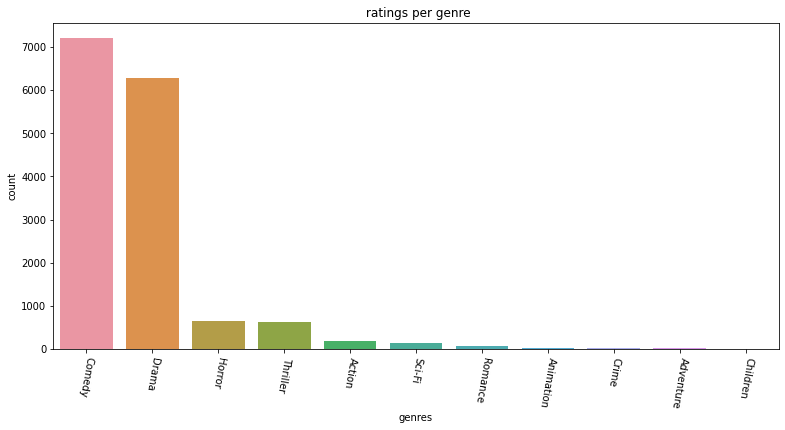

In [20]:
plt.subplots(figsize=(13,6))
sns.countplot(x='genres', order = genres_df['genres'].value_counts().index, data=genres_df);
plt.xticks(rotation=-100)
plt.title(' ratings per genre');

In [21]:
movie_rating.head()

,movieId,title,genres,Year,userId,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,1,4.0
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,5,4.0
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,7,4.5
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,15,2.5
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,17,4.5


In [22]:
genres_unique

,genre
0,Adventure
1,Animation
2,Children
3,Comedy
4,Fantasy
5,Romance
6,Drama
7,Action
8,Crime
9,Thriller


#  UserRating - by Genre

# Analysis with the year

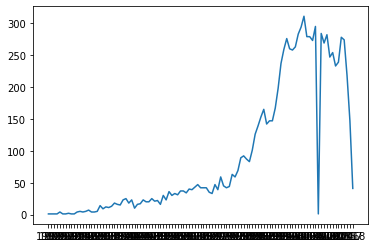

Max No.of Movies Relesed = 311
Year = 2002


count    107.000000
mean      90.934579
std      102.122223
min        1.000000
25%       16.000000
50%       39.000000
75%      150.000000
max      311.000000
Name: title, dtype: float64

In [23]:
#Ploting a Graph with No.of Movies each Year corresponding to its Year
plt.plot(movies.groupby('Year').title.count())
plt.show()
a=movies.groupby('Year').title.count()
print('Max No.of Movies Relesed =',a.max())
for i in a.index:
    if a[i] == a.max():
        print('Year =',i)
a.describe()

Max No.of Movies Relesed = 311
Year = 2002





count    107.000000
mean      90.934579
std      102.122223
min        1.000000
25%       16.000000
50%       39.000000
75%      150.000000
max      311.000000
Name: title, dtype: float64

In [24]:
# Visualizing overall ratings by user
groupby_ratings = ratings.groupby('userId')

<Figure size 1800x720 with 0 Axes>

(array([ 232.,   29.,    0.,   39.,  216.,    0.,   44.,    0.,  314.,
         152.,    0.,   47.,    0.,   46.,  140.,    0.,   64.,    0.,
          32.,   31.,    0.,   48.,  135.,    0.,   98.,    0.,  105.,
         502.,    0.,  703.,    0.,  242.,  443.,    0.,  119.,    0.,
         121.,  110.,    0.,   26.,    0.,   21.,  135.,    0.,  570.,
          81.,    0.,   34.,    0.,   50.,  102.,    0.,  156.,    0.,
          86.,   23.,    0.,   60.,    0.,   21.,   78.,    0.,  100.,
           0.,  103.,  217.,    0.,  440.,  114.,    0.,   48.,    0.,
         399.,   42.,    0.,  140.,    0.,   33.,   21.,    0.,  310.,
           0.,  359.,  130.,    0.,   20.,    0.,   33.,   25.,    0.,
          46.,  476.,    0.,  112.,    0.,  107.,   22.,    0.,   39.,
           0.,  366.,  271.,    0.,  517.,    0.,   34.,  345.,    0.,
          36.,    0., 1260.,   46.,    0.,   62.,   35.,    0.,   45.,
           0.,  210.,  177.,    0.,   69.,    0.,  119.,   29.,    0.,
      

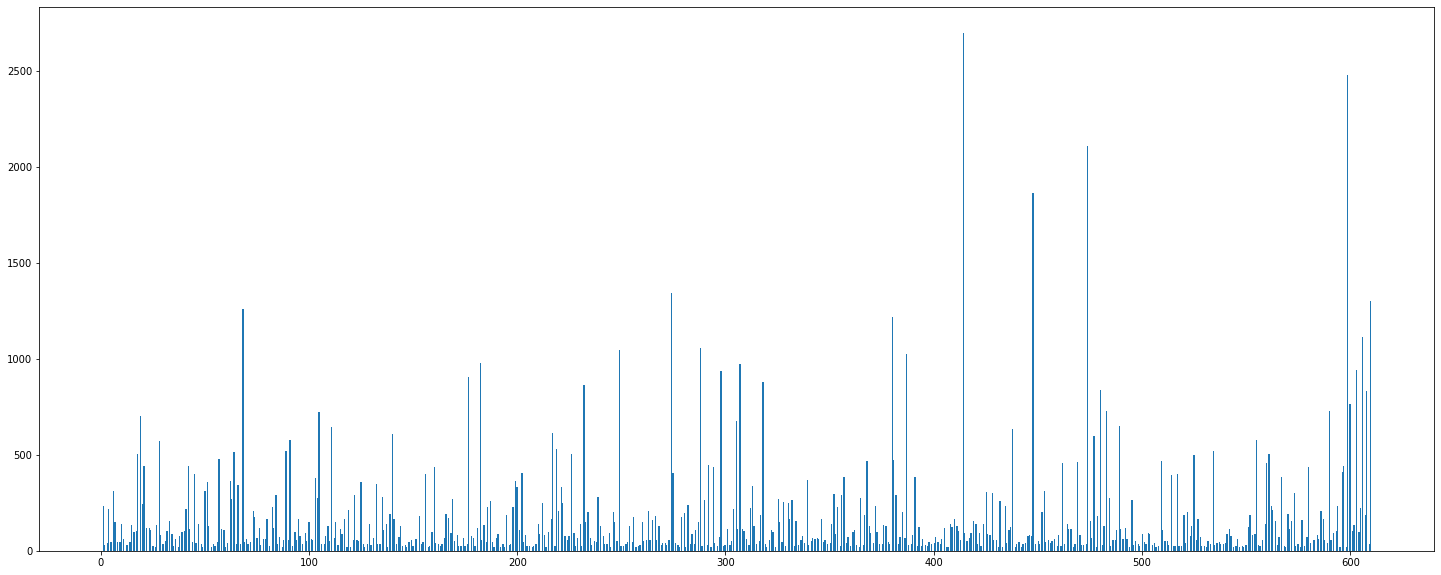

In [25]:
plt.figure(figsize = (25, 10))
plt.hist(x = [ratings.userId], bins = 1000)
plt.show()

In [26]:
# Rating given to each movie by each user

In [27]:
ratingspivot=ratings.pivot_table(index='userId', columns='movieId', values='rating')
ratingspivot

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,4.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,2.5,NaN,NaN,NaN,NaN,NaN,2.5,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
607,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
608,2.5,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
arrrating = ratingspivot.to_numpy()
arrrating

array([[4. , nan, 4. , ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [2.5, 2. , 2. , ..., nan, nan, nan],
       [3. , nan, nan, ..., nan, nan, nan],
       [5. , nan, nan, ..., nan, nan, nan]])

In [29]:
arrrating[np.isnan(arrrating)]=0
arrrating

array([[4. , 0. , 4. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       ...,
       [2.5, 2. , 2. , ..., 0. , 0. , 0. ],
       [3. , 0. , 0. , ..., 0. , 0. , 0. ],
       [5. , 0. , 0. , ..., 0. , 0. , 0. ]])

# Similarity between each user

In [30]:
arrrating = 1-pairwise_distances(arrrating, metric="cosine")
arrrating

array([[1.        , 0.02728287, 0.05972026, ..., 0.29109737, 0.09357193,
        0.14532081],
       [0.02728287, 1.        , 0.        , ..., 0.04621095, 0.0275654 ,
        0.10242675],
       [0.05972026, 0.        , 1.        , ..., 0.02112846, 0.        ,
        0.03211875],
       ...,
       [0.29109737, 0.04621095, 0.02112846, ..., 1.        , 0.12199271,
        0.32205486],
       [0.09357193, 0.0275654 , 0.        , ..., 0.12199271, 1.        ,
        0.05322546],
       [0.14532081, 0.10242675, 0.03211875, ..., 0.32205486, 0.05322546,
        1.        ]])

In [31]:
arrrating.shape

(610, 610)

# Merge user and rating


#### Objectives:-
- create a recommendation system using the **movielens** dataset
- use collaborative filtering and content based recommendation to suggest movies to users
- build an app with a simple UI and build an API for the model



#### Tech Stack:- 
- Python: scikit-learn, pandas, matplotlib, streamlit, SQLite3
- API: FastAPI


#### App:-
- the application will have user login and sign up page through which the users can access the home page
- the home page will have a search bar to search for movies

#### Objectives:-
- create a recommendation system using the **movielens** dataset
- use collaborative filtering and content based recommendation to suggest movies to users
- build an app with a simple UI and build an API for the model

### Train-test split


In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(movie_rating, test_size = 0.30, random_state = 42)

print(X_train.shape)
print(X_test.shape)

(70585, 6)
(30251, 6)


In [33]:
# pivot ratings into movie features
user_data = X_train.pivot(index = 'userId', columns = 'movieId', values = 'rating').fillna(0)
user_data.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,191005,193565,193567,193571,193573,193579,193581,193583,193585,193587
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Create a Copy of train and test dataset
These datasets will be used for prediction and evaluation.

Dummy train will be used later for prediction of the movies which has not been rated by the user. To ignore the movies rated by the user, we will mark it as 0 during prediction. The movies not rated by user is marked as 1 for prediction.

Dummy test will be used for evaluation. To evaluate, we will only make prediction on the movies rated by the user. So, this is marked as 1. This is just opposite of dummy_train

In [34]:
# make a copy of train and test datasets
dummy_train = X_train.copy()
dummy_test = X_test.copy()

dummy_train['rating'] = dummy_train['rating'].apply(lambda x: 0 if x > 0 else 1)
dummy_test['rating'] = dummy_test['rating'].apply(lambda x: 1 if x > 0 else 0)

In [36]:
# The movies not rated by user is marked as 1 for prediction 
dummy_train = dummy_train.pivot(index = 'userId', columns = 'movieId', values = 'rating').fillna(1)

# The movies not rated by user is marked as 0 for evaluation 
dummy_test = dummy_test.pivot(index ='userId', columns = 'movieId', values = 'rating').fillna(0)

In [37]:
dummy_train.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,191005,193565,193567,193571,193573,193579,193581,193583,193585,193587
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
5,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [38]:
dummy_test.head()


movieId,1,2,3,4,5,6,7,8,9,10,...,187595,187717,188189,188301,188675,188751,189043,189333,190209,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
from sklearn.metrics.pairwise import cosine_similarity

# User Similarity Matrix using Cosine similarity as a similarity measure between Users
user_similarity = cosine_similarity(user_data)
user_similarity[np.isnan(user_similarity)] = 0
print(user_similarity)
print(user_similarity.shape)

[[1.         0.0188577  0.00256256 ... 0.1979789  0.07456909 0.08266859]
 [0.0188577  1.         0.         ... 0.02253806 0.03653781 0.06463303]
 [0.00256256 0.         1.         ... 0.0234284  0.         0.03180084]
 ...
 [0.1979789  0.02253806 0.0234284  ... 1.         0.0722809  0.22174948]
 [0.07456909 0.03653781 0.         ... 0.0722809  1.         0.04191063]
 [0.08266859 0.06463303 0.03180084 ... 0.22174948 0.04191063 1.        ]]
(610, 610)


## Predicting the User ratings on the movies

In [40]:
user_predicted_ratings = np.dot(user_similarity, user_data)
user_predicted_ratings

array([[7.93366247e+01, 2.87123016e+01, 1.97663828e+01, ...,
        2.82092891e-02, 2.82092891e-02, 2.82092891e-02],
       [2.07445829e+01, 1.08242811e+01, 2.84611394e+00, ...,
        1.56387817e-01, 1.56387817e-01, 1.56387817e-01],
       [4.38494834e+00, 2.38850091e+00, 1.61431993e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.06679340e+02, 4.68615635e+01, 2.40820864e+01, ...,
        2.41874305e-02, 2.41874305e-02, 2.41874305e-02],
       [6.84732927e+01, 2.91029861e+01, 1.18325448e+01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [7.72757419e+01, 3.22339161e+01, 1.18558831e+01, ...,
        2.74561905e-01, 2.74561905e-01, 2.74561905e-01]])

In [41]:
user_predicted_ratings.shape

(610, 8555)

We do not want to recommend the same movie that the user already watched. We are interested only in the movies not rated by the user, we will ignore the movies rated by the user.

This is where we will use our dummy train matrix that we previously built.

In [42]:
# np.multiply for cell-by-cell multiplication 

user_final_ratings = np.multiply(user_predicted_ratings, dummy_train)
user_final_ratings.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,191005,193565,193567,193571,193573,193579,193581,193583,193585,193587
userId,,,,,,,,,,,,,,,,,,,,,
1,0.000000,28.712302,0.000000,0.489634,10.021553,31.350678,13.384650,2.140618,3.428125,40.337808,...,0.036269,0.028209,0.024179,0.032239,0.032239,0.028209,0.032239,0.028209,0.028209,0.028209
2,20.744583,10.824281,2.846114,0.067024,2.703443,8.380067,2.346923,0.549787,0.531002,10.716949,...,0.201070,0.156388,0.134047,0.178729,0.178729,0.156388,0.178729,0.156388,0.156388,0.156388
3,4.384948,2.388501,1.614320,0.013641,0.846663,2.725630,0.773344,0.266013,0.404326,2.871617,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,51.862028,18.989098,10.312520,0.274464,6.884468,20.873052,8.715537,1.168679,1.844386,26.369811,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,33.611741,13.123494,1.400191,15.255541,32.079379,17.240016,3.301993,2.650740,48.301241,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


## Top 5 movie recommendations for the User 39

In [65]:
user_final_ratings.iloc[39].sort_values(ascending = False)[0:5]

movieId
356    88.691745
593    70.250041
457    68.952488
480    67.872273
590    65.395232
Name: 40, dtype: float64

## Evaluation

Evaluation will we same as you have seen above for the prediction. The only difference being, you will evaluate for the movie already rated by the User instead of predicting it for the movie not rated by the user.

## Using User-User similarity

In [44]:
test_user_features = X_test.pivot(index = 'userId', columns = 'movieId', values = 'rating').fillna(0)
test_user_similarity = cosine_similarity(test_user_features)
test_user_similarity[np.isnan(test_user_similarity)] = 0

print(test_user_similarity)
print("- "*10)
print(test_user_similarity.shape)

[[1.         0.         0.08194175 ... 0.12933091 0.11061626 0.04773141]
 [0.         1.         0.         ... 0.         0.         0.0202324 ]
 [0.08194175 0.         1.         ... 0.00298996 0.         0.        ]
 ...
 [0.12933091 0.         0.00298996 ... 1.         0.03097599 0.13762333]
 [0.11061626 0.         0.         ... 0.03097599 1.         0.04152099]
 [0.04773141 0.0202324  0.         ... 0.13762333 0.04152099 1.        ]]
- - - - - - - - - - 
(610, 610)


In [45]:
user_predicted_ratings_test = np.dot(test_user_similarity, test_user_features)
user_predicted_ratings_test

array([[12.85557779,  8.48183722,  1.95681012, ...,  0.31822875,
         0.        ,  0.05552109],
       [ 4.1219954 ,  2.05476797,  0.67401891, ...,  0.        ,
         0.        ,  0.30337162],
       [ 0.73819586,  0.69573266,  0.09592639, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [15.05956735,  9.60740732,  2.90404021, ...,  0.20194463,
         0.10210727,  0.05604999],
       [ 6.75473248,  7.1559406 ,  2.13590677, ...,  0.        ,
         0.        ,  0.27670234],
       [12.54880497,  7.44894497,  1.51617846, ...,  0.16749045,
         0.24920779,  0.35658846]])

## Testing on the movies already rated by the user

In [46]:
test_user_final_rating = np.multiply(user_predicted_ratings_test, dummy_test)
test_user_final_rating.head()


movieId,1,2,3,4,5,6,7,8,9,10,...,187595,187717,188189,188301,188675,188751,189043,189333,190209,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,16.948207,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
ratings['rating'].describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

In [48]:
from sklearn.preprocessing import MinMaxScaler

X = test_user_final_rating.copy() 
X = X[X > 0] # only consider non-zero values as 0 means the user haven't rated the movies

scaler = MinMaxScaler(feature_range = (0.5, 5))
scaler.fit(X)
pred = scaler.transform(X)

print(pred)

MinMaxScaler(feature_range=(0.5, 5))

[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [49]:
# total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(pred))
total_non_nan

30251

In [50]:
test = X_test.pivot(index = 'userId', columns = 'movieId', values = 'rating')
test.head()


movieId,1,2,3,4,5,6,7,8,9,10,...,187595,187717,188189,188301,188675,188751,189043,189333,190209,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
# Mean abslute error

mae = np.abs(pred - test).sum().sum()/total_non_nan
print(mae)

1.2039035117427461


## Using Item-Item Similarity

In [53]:
test_item_features = X_test.pivot(index = 'movieId', columns = 'userId', values = 'rating').fillna(0)
test_item_similarity = cosine_similarity(test_item_features)
test_item_similarity[np.isnan(test_item_similarity)] = 0 

print(test_item_similarity)
print("- "*10)
print(test_item_similarity.shape)

[[1.         0.19940087 0.08352351 ... 0.         0.         0.        ]
 [0.19940087 1.         0.19190997 ... 0.         0.         0.        ]
 [0.08352351 0.19190997 1.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 1.         0.         0.        ]
 [0.         0.         0.         ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]]
- - - - - - - - - - 
(6104, 6104)


In [54]:
item_predicted_ratings_test = np.dot(test_item_features.T, test_item_similarity )
item_predicted_ratings_test

array([[26.91528138, 27.10538397, 14.24414586, ...,  1.70753189,
         0.        ,  0.35823609],
       [ 2.05483352,  1.6339724 ,  1.71139363, ...,  0.        ,
         0.        ,  0.71437571],
       [ 0.43277175,  0.61747551,  0.68341929, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [53.13908482, 57.74734579, 30.5847907 , ...,  1.46445397,
         0.96178094,  1.77075474],
       [ 2.08435082,  3.16981872,  2.02118514, ...,  0.        ,
         0.        ,  0.47764812],
       [71.00997593, 76.05041913, 26.13059514, ...,  3.842972  ,
         2.00768796, 10.77296146]])

## Testing on the movies already rated by the user

In [58]:
test_item_final_rating = np.multiply(item_predicted_ratings_test, dummy_test)
test_item_final_rating.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,187595,187717,188189,188301,188675,188751,189043,189333,190209,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,50.584541,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [59]:
ratings['rating'].describe()


count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

In [60]:
from sklearn.preprocessing import MinMaxScaler

X = test_item_final_rating.copy() 
X = X[X > 0] # only consider non-zero values as 0 means the user haven't rated the movies

scaler = MinMaxScaler(feature_range = (0.5, 5))
scaler.fit(X)
pred = scaler.transform(X)

print(pred)

MinMaxScaler(feature_range=(0.5, 5))

[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [61]:
# total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(pred))
total_non_nan

30251

In [62]:
test = X_test.pivot(index = 'userId', columns = 'movieId', values = 'rating')
test.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,187595,187717,188189,188301,188675,188751,189043,189333,190209,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
# RMSE Score

diff_sqr_matrix = (test - pred)**2
sum_of_squares_err = diff_sqr_matrix.sum().sum() # df.sum().sum() by default ignores null values

rmse = np.sqrt(sum_of_squares_err/total_non_nan)
print(rmse)

2.5114937145231715


In [64]:
# Mean abslute error

mae = np.abs(pred - test).sum().sum()/total_non_nan
print(mae)

2.213043000758558


It means that on an average our Item-based recommendation engine is making an error of 2.21 in predicting the User ratings.